<a href="https://colab.research.google.com/github/arvndms/ICT-DSA_ACTIVITY/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#checking null values
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [5]:
#scailing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
from sklearn.cluster import KMeans
# Find optimal K using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

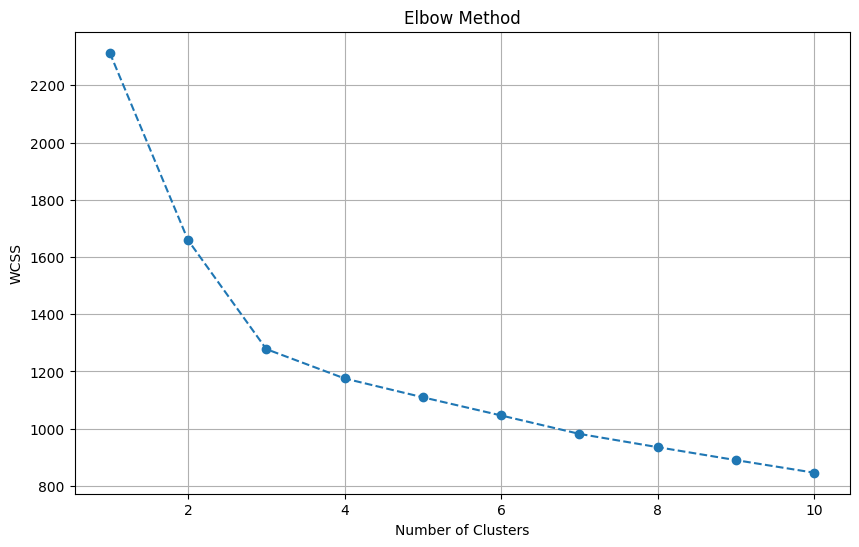

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_plot.png')

### KMean Clustering

In [8]:
#checking silhouette_score
from sklearn.metrics import silhouette_score

In [9]:
sil_scores = []
for i in range(2,10):
  k_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
  y_kmeans = k_means.fit_predict(data_scaled)
  s_score = silhouette_score(data_scaled,y_kmeans)
  sil_scores.append(s_score)

In [10]:
for i in range(2,10):
  print('Silhouette score for k = {} is {}'.format(i,sil_scores[i-2]))

Silhouette score for k = 2 is 0.2650328591008738
Silhouette score for k = 3 is 0.2848589191898987
Silhouette score for k = 4 is 0.25422758316007776
Silhouette score for k = 5 is 0.18362105107698137
Silhouette score for k = 6 is 0.16899191019013057
Silhouette score for k = 7 is 0.1726015561094921
Silhouette score for k = 8 is 0.16250411307671142
Silhouette score for k = 9 is 0.1738739334545086


In [11]:
#since Silhouette score and elbow method are prediciting k=3
k_means = KMeans(n_clusters=3,init='k-means++',random_state = 42)
y_kmeans = k_means.fit_predict(data_scaled)

AHC

In [12]:
from sklearn.cluster import AgglomerativeClustering


In [13]:
#Silhouette score for ahc
sil_scores_ahc = []
for i in range(2,10):
  ahc = AgglomerativeClustering(n_clusters=i,metric= 'euclidean',linkage='ward')
  y_ahc = ahc.fit_predict(data_scaled)
  s_score_ahc= silhouette_score(data_scaled,y_ahc)
  sil_scores_ahc.append(s_score_ahc)

In [14]:
for i in range(2,10):
  print('Silhouette score for k = {} is {}'.format(i,sil_scores_ahc[i-2]))

Silhouette score for k = 2 is 0.2670131771272231
Silhouette score for k = 3 is 0.2774439826952265
Silhouette score for k = 4 is 0.225836659334758
Silhouette score for k = 5 is 0.18674235566758707
Silhouette score for k = 6 is 0.17966642854438503
Silhouette score for k = 7 is 0.18685342560226942
Silhouette score for k = 8 is 0.18834697102837825
Silhouette score for k = 9 is 0.1917169293227209


In [15]:
ahc = AgglomerativeClustering(n_clusters=3,metric= 'euclidean',linkage='ward')
y_ahc = ahc.fit_predict(data_scaled)

In AgglomerativeClustering also we are getting number of clusters = 3

DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
from sklearn.decomposition import PCA

In [18]:
#reducing features using pca

In [19]:
pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_scaled)

In [20]:
dbscan = DBSCAN(eps=2,min_samples=5)
cluster = dbscan.fit_predict(data_pca)

In [21]:
n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0)
print("Number of clusters:", n_clusters)

Number of clusters: 1


DBSCAN gave 0,1,8 number of clusters in different settings

KMeans and AgglomerativeClustering are predicting 3 clusters and DBSCAN is giving inconsistent results